>Егор, приветствую! Меня зовут Кудрявцев Александр и я буду проверять твой проект :)
>
>Ниже в ноутбуке будут мои комментарии, закодированные разными цветами.
>
>**_<span style="color:green">Зеленым будут выделены места, которые хочется особенно отметить, как хорошие. </span>_**
>
> **_<span style="color:red">Недочеты, откомментированные красным обязательны к доработке – без их исправления домашка не будет зачтена. </span>_**
>  
> **_<span style="color:orange">Недочеты и подсказки, откомментированные оранжевым, учесть желательно, но их доработка не является обязательным условнием для зачета.</span>_**
>
> Если какие-то подзадачи не откомментированны – значит с ними все окей, нет возражений.
>
> Если ошибка влечет за собой дальнейшие неточности рассчетов или выводов – пожалуйста, поправь их тоже, чтобы аналитический отчет был целостным.
>
>Пожалуйста, не удаляй и не переноси мои комментарии, это позволит лучше ориентироваться при возможных повторных проверках.

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Вывод

Названия столбцов нормальные, понятные. Имеются пропуски в некоторых столбцах таблицы, неправильные типы данных, которые нужно поменять.

### Шаг 2. Предобработка данных

2.1. Предпросмотр конкретных значений

Проверим некоторые столбцы на адекватность значений. Например, странно, если продают квартиру с -1 комнатой. Доктор Кто бы позавидовал такой находке.

In [4]:
data['airports_nearest'][data['airports_nearest'] < 0].count()

0

In [5]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [6]:
data['ceiling_height'][data['ceiling_height'] < 0].count()

0

In [7]:
data['cityCenters_nearest'][data['cityCenters_nearest'] < 0].count()

0

In [8]:
data['days_exposition'][data['days_exposition'] < 0].count()

0

In [9]:
data['floor'][data['floor'] < 0].count()

0

In [10]:
data['floors_total'][data['floors_total'] < 0].count()

0

In [11]:
data['kitchen_area'][data['kitchen_area'] < 0].count()

0

In [12]:
data['last_price'][data['last_price'] < 0].count()

0

In [13]:
data['living_area'][data['living_area'] < 0].count()

0

In [14]:
data['locality_name'].value_counts().head()

Санкт-Петербург    15721
посёлок Мурино       522
посёлок Шушары       440
Всеволожск           398
Пушкин               369
Name: locality_name, dtype: int64

In [15]:
data['parks_around3000'][data['parks_around3000'] < 0].count()

0

In [16]:
data['parks_nearest'][data['parks_nearest'] < 0].count()

0

In [17]:
data['ponds_around3000'][data['ponds_around3000'] < 0].count()

0

In [18]:
data['ponds_nearest'][data['ponds_nearest'] < 0].count()

0

In [19]:
data['rooms'][data['rooms'] < 0].count()

0

In [20]:
data['total_area'][data['total_area'] < 0].count()

0

In [21]:
data['total_images'][data['total_images'] < 0].count()

0

С первого взгляда все значения немного адекватные.

2.2. Обработка пропусков

Смотрим, если ли пропущенные значения и обрабатываем.

In [22]:
data['balcony'].isnull().sum()

11519

Заменяем пропущенные значения из соображений логики и здравого смысла. Например, если пропущенно количество балконов, то скорее всего балкона нет.

In [23]:
data['balcony'] = data['balcony'].fillna(0)

In [24]:
data['floors_total'].isnull().sum()

86

In [25]:
data['floors_total'].isnull().sum()/data.shape[0]*100

0.36288450989493226

Меньше 1%, можно дропнуть эти строки, будет на 1 проблему меньше.

In [26]:
data.dropna(subset=['floors_total'], inplace=True)

Тоже самое и с апартаментами.

In [27]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [28]:
data['locality_name'].isnull().sum()/data.shape[0]*100

0.2032778554186253

In [29]:
data.dropna(subset=['locality_name'], inplace=True)

Тоже самое и со свободной планировкой.

In [30]:
data['open_plan'] = data['open_plan'].fillna(False)

In [31]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [32]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

В итоге получил

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null float64
living_area             21700 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            21343 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        23565 non-null float64
parks_nearest           8030 non-null float64
ponds_around3000

Многие столбцы теперь заполнены. Это очень хорошо.

2.3. Изменение типов данных

Теперь изменяю типы данных. Например, количество балконов не может быть дробным, если только не собираетесь использовать соседский балкон. Так же и для площадей. Конечно, площади могут быть дробным в обычном мире, но в особом мире риэлторских услуг часто указывает только целую часть. Так же косается валюты. А вот расстояния, я решил оставить дробными.

In [34]:
data['balcony'] = data['balcony'].astype('int')

In [35]:
data['days_exposition'] = data['days_exposition'].fillna(-1) #заполнение, иначе выдает ошибку. не очень понятно, почему
data['days_exposition'] = data['days_exposition'].astype('int')

Сделаем замену строки нормальным типом. Минуты и часы можно отбросить, столбец именно характеризует именно день размещения объявления.

In [36]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

In [37]:
data['floors_total'] = data['floors_total'].astype('int')

In [38]:
data['kitchen_area'] = data['kitchen_area'].fillna(-1)
data['kitchen_area'] = data['kitchen_area'].astype('int')

In [39]:
data['last_price'] = data['last_price'].astype('int')

In [40]:
data['living_area'] = data['living_area'].fillna(-1)
data['living_area'] = data['living_area'].astype('int')

In [41]:
data['parks_around3000'] = data['parks_around3000'].astype('int')

In [42]:
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

In [43]:
#data['total_area'] = data['total_area'].fillna(-1)
data['total_area'] = data['total_area'].astype('int')

Теперь с типами данных все впорядке, двигаюсь дальше.

2.4. Поиск дубликатов

Уникальных значений (id пользователя и тд), по которым бы можно было бы искать дубликаты нету, поэтому буду искать полностью идентичные строки.

In [44]:
data.duplicated().sum()

0

"Лучше дубликатов может быть только их отсутствие."

### Вывод

Смотрю, что получилось в итоге

In [45]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,...,25,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,-1
1,7,3350000,40,2018-12-04,1,NaN,11,18,1,False,...,11,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000,56,2015-08-20,2,NaN,5,34,4,False,...,8,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000,159,2015-07-24,3,NaN,14,-1,9,False,...,-1,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,...,41,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121
5,10,2890000,30,2018-09-10,1,NaN,12,14,5,False,...,9,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55
6,6,3700000,37,2017-11-02,1,NaN,26,10,6,False,...,14,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155
7,5,7915000,71,2019-04-18,2,NaN,24,-1,22,False,...,18,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,-1
8,20,2900000,33,2018-05-23,1,NaN,27,15,26,False,...,8,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189
9,18,5400000,61,2017-02-26,3,2.50,9,43,7,False,...,6,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null int64
total_area              23565 non-null int64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null int64
living_area             23565 non-null int64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null int64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        23565 non-null int64
parks_nearest           8030 non-null float64
ponds_around3000      

Проделал небольшую работу по обработке дубликатов, которых неоказалось, заполнению пропущенных значений, а так же изменению некоторых типов данных. Теперь DF подходит для дальнейшего анализа.

### Шаг 3. Посчитайте и добавьте в таблицу

Добавляю некоторые столбцы в таблицу. А именно: цену квадратного метра, день недели размещения объявления, а так же месяц и год, группировку этажей.

In [47]:
data['cost_of_meter'] = (data['last_price'] / data['total_area']).astype('int')

In [48]:
data['day'] = data['first_day_exposition'].apply(lambda row: row.weekday())

In [49]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [50]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [51]:
def floor_func(row):
    if row['floor'] == 1:
        return 'первый'  
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'средненький'

In [52]:
data['floor_group'] = data.apply(floor_func, axis=1)

В предыдущих разделах, я заполнил все пропуски в площадях квартир отрицательными значениями, поэтому сейчас не придется использовать конструкцию try.

In [53]:
data['share_living'] = data['living_area'] / data['total_area']

In [54]:
data['share_kitchen'] = data['kitchen_area'] / data['total_area']

In [55]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cost_of_meter,day,month,year,floor_group,share_living,share_kitchen
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,...,2,755.0,-1,120370,3,3,2019,средненький,0.472222,0.231481
1,7,3350000,40,2018-12-04,1,NaN,11,18,1,False,...,0,NaN,81,83750,1,12,2018,первый,0.450000,0.275000
2,10,5196000,56,2015-08-20,2,NaN,5,34,4,False,...,2,574.0,558,92785,3,8,2015,средненький,0.607143,0.142857
3,0,64900000,159,2015-07-24,3,NaN,14,-1,9,False,...,3,234.0,424,408176,4,7,2015,средненький,-0.006289,-0.006289
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,...,1,48.0,121,100000,1,6,2018,средненький,0.320000,0.410000
5,10,2890000,30,2018-09-10,1,NaN,12,14,5,False,...,0,NaN,55,96333,0,9,2018,средненький,0.466667,0.300000
6,6,3700000,37,2017-11-02,1,NaN,26,10,6,False,...,0,NaN,155,100000,3,11,2017,средненький,0.270270,0.378378
7,5,7915000,71,2019-04-18,2,NaN,24,-1,22,False,...,0,NaN,-1,111478,3,4,2019,средненький,-0.014085,0.253521
8,20,2900000,33,2018-05-23,1,NaN,27,15,26,False,...,0,NaN,189,87878,2,5,2018,средненький,0.454545,0.242424
9,18,5400000,61,2017-02-26,3,2.50,9,43,7,False,...,0,NaN,289,88524,6,2,2017,средненький,0.704918,0.098361


### Вывод

Успешно добавим несколько столбцов в таблицу.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

In [56]:
import matplotlib.pyplot as plt

Внимательно просмотрю некоторые параметры

Видно, что есть распределения похожи на Пуассоновские. Есть длинные хвосты, которые уберу в дальнейшем.

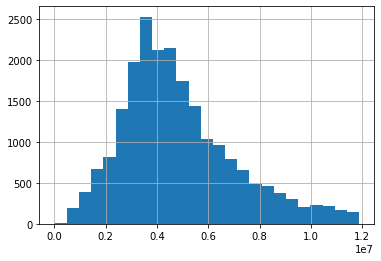

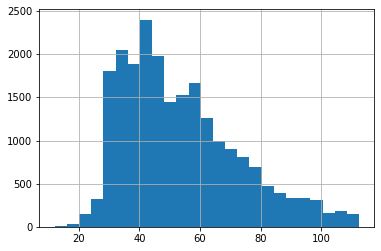

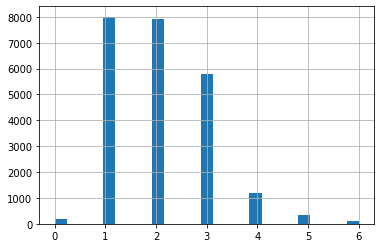

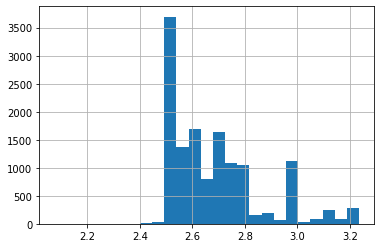

In [57]:
cols = ['last_price', 'total_area', 'rooms', 'ceiling_height']

for col in cols:
    iqr = data[col].quantile(.75) - data[col].quantile(.25)
    
    if data[col].quantile(.25) - 1.5 * iqr > 0:
        lower_bound = data[col].quantile(.25) - 1.5 * iqr
    else:
        lower_bound = data[col].min()
        
    upper_bound = data[col].quantile(.75) + 1.5 * iqr
    
    bins = 25
    
    data[col].hist(bins = bins, range = (lower_bound, upper_bound))
    plt.show()
    
    

Посмотрим на время продажи квартир.

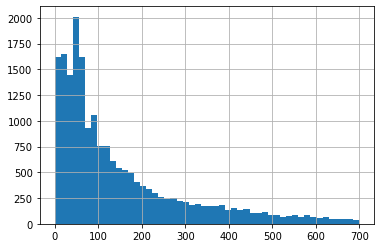

In [58]:
data['days_exposition'].hist(bins=50,range=(0,700))

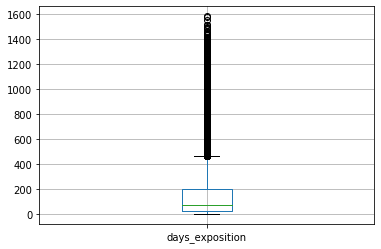

In [59]:
data.boxplot(column='days_exposition')

In [60]:
data['days_exposition'].describe()

count    23565.000000
mean       156.285551
std        213.616127
min         -1.000000
25%         22.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

Я считаю, что если квартира продалась за 21 день (<25%) и менее, то это быстрая продажа, а если 199(>75%) и более, то очень долгая. Квартиры, которые продаются по несколько лет лучше конечно убрать.

Далее уберу редкие и выбивающиеся значения из соображений логики и здравого смысла, а так же благодаря коробке с усами.

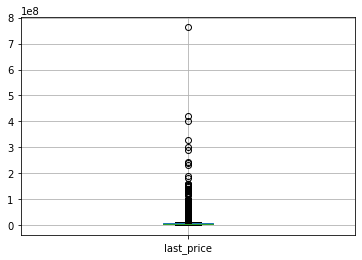

In [61]:
data.boxplot(column='last_price')

In [62]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [63]:
IQR_price = 6.790000e+06 - 3.400000e+06

In [64]:
data = data.query('last_price < 6.790000e+06 + 1.5 * @IQR_price')
data = data.query('last_price > 3.400000e+06 - 1.5 * @IQR_price')

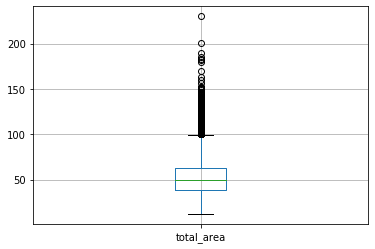

In [65]:
data.boxplot(column='total_area')

In [66]:
data['total_area'].describe()

count    21519.000000
mean        53.014545
std         19.048442
min         12.000000
25%         39.000000
50%         49.000000
75%         63.000000
max        230.000000
Name: total_area, dtype: float64

In [67]:
IQR_area = 63 - 39

In [68]:
#data = data.query('(last_price < (63 + 1.5 * @IQR_area)) and (last_price > (39 - 1.5 * @IQR_area))')
data = data.query('total_area < 63 + 1.5 * @IQR_area')
data = data.query('total_area > 39 - 1.5 * @IQR_area')

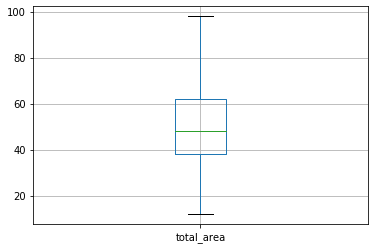

In [69]:
data.boxplot(column='total_area')

Смотрю, что получилось

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21009 entries, 1 to 23698
Data columns (total 29 columns):
total_images            21009 non-null int64
last_price              21009 non-null int64
total_area              21009 non-null int64
first_day_exposition    21009 non-null datetime64[ns]
rooms                   21009 non-null int64
ceiling_height          12730 non-null float64
floors_total            21009 non-null int64
living_area             21009 non-null int64
floor                   21009 non-null int64
is_apartment            21009 non-null bool
studio                  21009 non-null bool
open_plan               21009 non-null bool
kitchen_area            21009 non-null int64
balcony                 21009 non-null int64
locality_name           21009 non-null object
airports_nearest        15588 non-null float64
cityCenters_nearest     15599 non-null float64
parks_around3000        21009 non-null int64
parks_nearest           6433 non-null float64
ponds_around3000      

In [71]:
stat_data = data.loc[:, ['cost_of_meter', 'last_price', 'rooms', 'total_area', ]]

In [72]:
stat_data_date = data.loc[:, ['last_price', 'day', 'month', 'year']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32ba9e1cd0>,
      dtype=object)

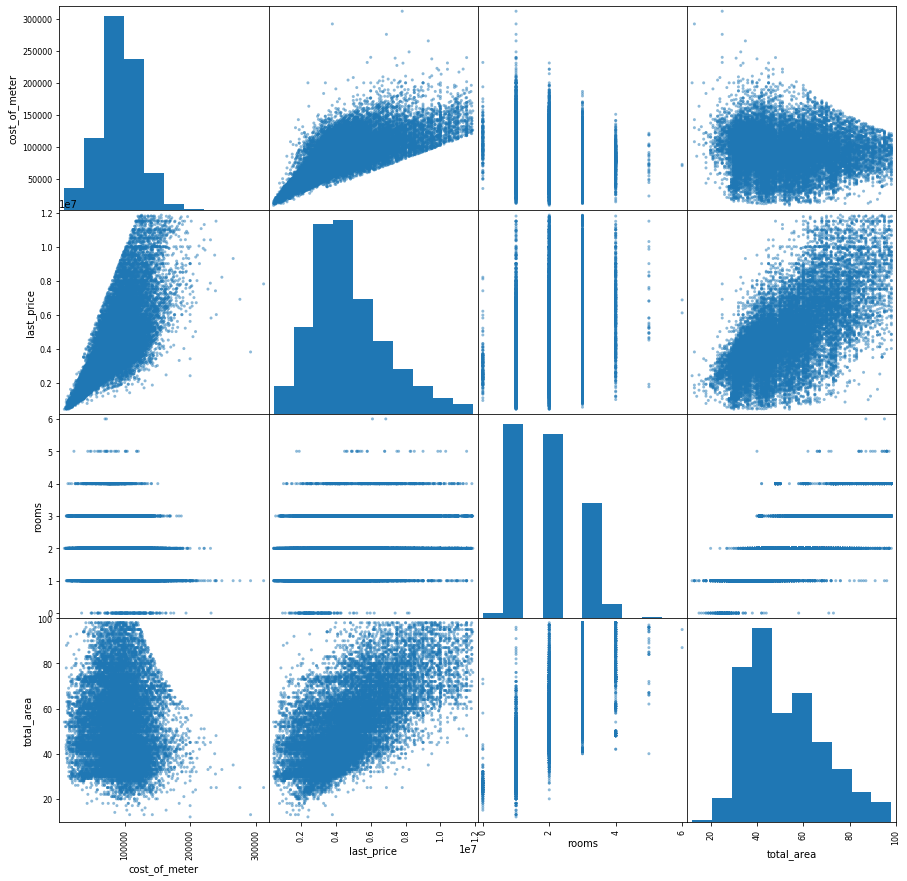

In [73]:
pd.plotting.scatter_matrix(stat_data, figsize=(15, 15)) #У меня нормально на экран помещается, если что

In [74]:
stat_data.corr()

,cost_of_meter,last_price,rooms,total_area
cost_of_meter,1.000000,0.650481,-0.235968,-0.078258
last_price,0.650481,1.000000,0.403983,0.674955
rooms,-0.235968,0.403983,1.000000,0.798158
total_area,-0.078258,0.674955,0.798158,1.000000


Такое ощущение, что цена квартиры, не зависит от количества комнат, но тут может играть расстояние от центра, "однушка" в центре могут стоить как "трёшка" у окраины.

Квартиры с большей площадью логично должны стоить дороже. Чем меньше площадь дома, тем легче дать ему действительно правдивую стоимость, поэтом такое плотное облако в районе малых площадей.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32ba3f3ed0>,
      dtype=object)

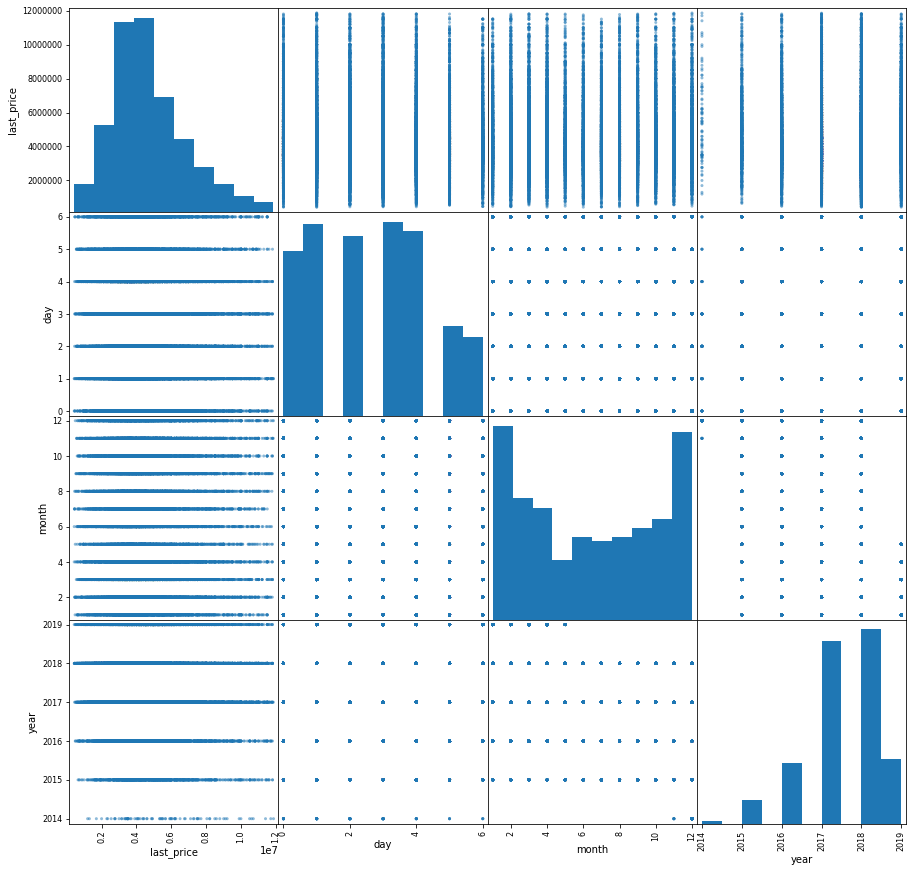

In [75]:
pd.plotting.scatter_matrix(stat_data_date, figsize=(15, 15))

In [76]:
stat_data_date.corr()

,last_price,day,month,year
last_price,1.000000,-0.012074,0.004366,0.014888
day,-0.012074,1.000000,0.011943,-0.001948
month,0.004366,0.011943,1.000000,-0.270243
year,0.014888,-0.001948,-0.270243,1.000000


Можно не переживать, что подал объявление в понедельник, когда все люди злые и хотят только побыстрее вернуться домой с работы.

Тоже можно сказать и про месяца.

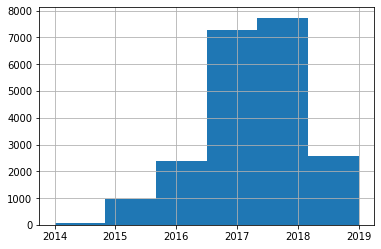

In [77]:
data['year'].hist(bins=6)

А вот с колличеством объявлений не так все хорошо. Если взглянуть на индекс Мосбиржи, пик был как раз в районе 2017-18 годов, а далее пошел спад как и в количестве продаж квартир.

In [78]:
data.groupby('floor_group')['last_price'].mean()

floor_group
первый         4.043503e+06
последний      4.336908e+06
средненький    4.931981e+06
Name: last_price, dtype: float64

Средненькие квартиры продаются подороже, наверное спрос на такие лучше.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


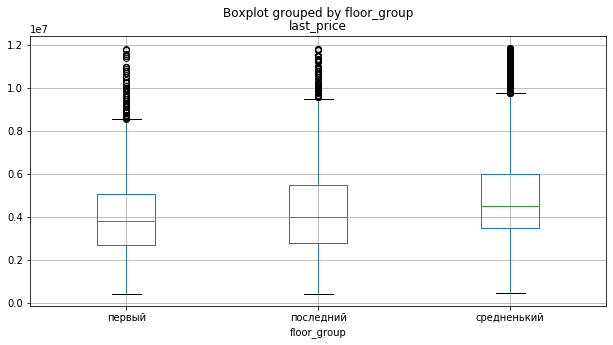

In [79]:
data.boxplot('last_price', by='floor_group', figsize=(10, 5))

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


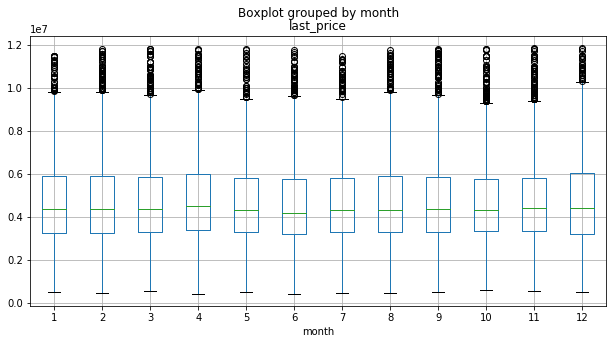

In [80]:
data.boxplot('last_price', by='month', figsize=(10, 5))

Уделяем внимание населенным распределению по городам и селам.

In [81]:
data['locality_name'].value_counts().head(10)

Санкт-Петербург      13278
посёлок Мурино         520
посёлок Шушары         430
Всеволожск             389
Пушкин                 334
Колпино                331
посёлок Парголово      324
Гатчина                300
деревня Кудрово        297
Выборг                 222
Name: locality_name, dtype: int64

In [82]:
from pymystem3 import Mystem
m = Mystem()

In [83]:
trash = ['город', 'городской', 'поселок', 'рабочий', 'село', 'деревня', 'тип', 'имя', 'поселение', 'столица']

In [84]:
def filter(row):
    global trash
    for i in row:
        if i in trash:
            row.remove(i)
    return ' '.join(row).strip()

In [85]:
data['filtred_local'] = data['locality_name'].apply(m.lemmatize).apply(filter)
data['filtred_local'].value_counts().head(10)

санкт-петербург    13278
муриный              585
кудрово              467
шушар                430
всеволожск           389
пушкин               334
колпино              331
парголовый           324
гатчина              300
выборг               222
Name: filtred_local, dtype: int64

Из деревни Шушары после лемматизации исчезли почти все шушары. Но проблема с окончаниями это лишь малая плата за более полный список лидеров.

In [86]:
liders = data['filtred_local'].value_counts().head(10).index

Формирую список с названиями лидирующих городов.

In [87]:
list_of_liders = []
for i in liders:
    list_of_liders.append(i)
list_of_liders

['санкт-петербург',
 'муриный',
 'кудрово',
 'шушар',
 'всеволожск',
 'пушкин',
 'колпино',
 'парголовый',
 'гатчина',
 'выборг']

In [88]:
grouped_by_liders = data.query('filtred_local in @list_of_liders')

In [89]:
grouped_by_liders = grouped_by_liders.groupby('filtred_local').mean()

In [90]:
grouped_by_liders.sort_values('cost_of_meter', ascending=False)['cost_of_meter']

filtred_local
санкт-петербург    106523.425365
пушкин             101004.050898
кудрово             95632.620985
парголовый          90998.228395
муриный             86691.803419
шушар               79056.400000
колпино             75689.099698
гатчина             68984.946667
всеволожск          67439.935733
выборг              58423.734234
Name: cost_of_meter, dtype: float64

Ожидаемый результат. В крупных городах квартиры гораздо дешевле, чем в остальных.

In [91]:
clean_data = data.dropna(subset=['cityCenters_nearest']).query('filtred_local == "санкт-петербург"')

In [92]:
clean_data['cityCenters_nearest_km'] = (clean_data['cityCenters_nearest'] / 1000).astype('int')

In [93]:
clean_data_grouped = clean_data.groupby('cityCenters_nearest_km')['last_price'].median()

<BarContainer object of 30 artists>

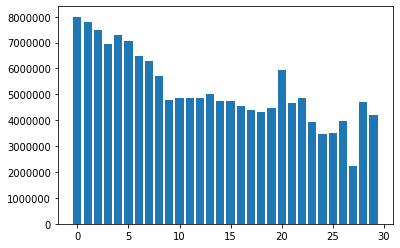

In [94]:
plt.bar(clean_data_grouped.index, clean_data_grouped)

Из графика видно, что 8км - граница центра.

In [95]:
clean_data_centre = clean_data.query('cityCenters_nearest_km <= 8')

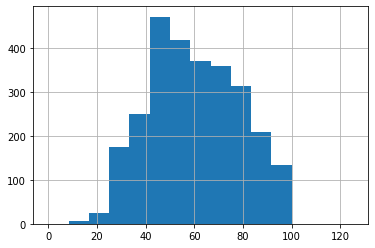

In [96]:
clean_data_centre['total_area'].hist(bins=15, range=(0, 125))


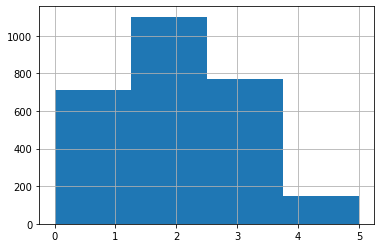

In [97]:
clean_data_centre['rooms'].hist(bins=4)

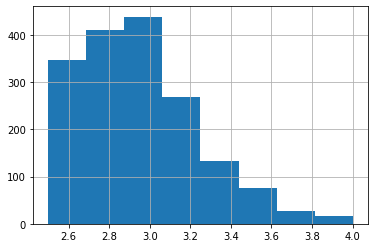

In [98]:
clean_data_centre['ceiling_height'].hist(bins=8, range=(2.5, 4))

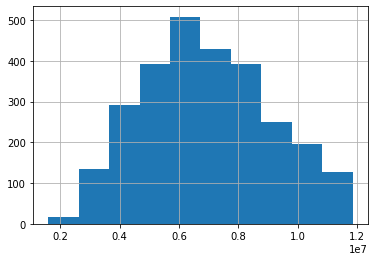

In [99]:
clean_data_centre['last_price'].hist(bins=10)

In [100]:
clean_stat_data = clean_data_centre.loc[:, ['cost_of_meter', 'last_price', 'rooms', 'total_area', ]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32dd834550>,
      dtype=object)

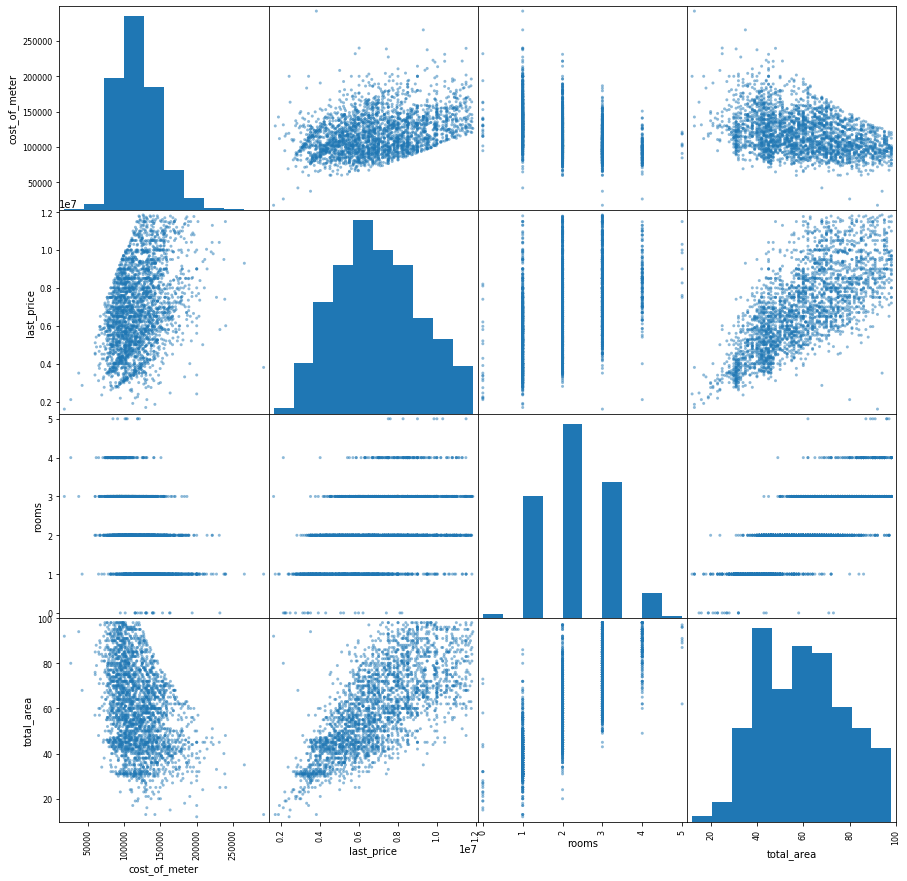

In [101]:
pd.plotting.scatter_matrix(clean_stat_data, figsize=(15, 15)) #У меня нормально на экран помещается, если что

In [102]:
clean_stat_data.corr()

,cost_of_meter,last_price,rooms,total_area
cost_of_meter,1.000000,0.359306,-0.457183,-0.366800
last_price,0.359306,1.000000,0.421788,0.708437
rooms,-0.457183,0.421788,1.000000,0.776516
total_area,-0.366800,0.708437,0.776516,1.000000


Зависимость похожа, как и для общей даты, с разницей в том,  что облако сместилось вверх, так как подросла общая цена на квартиры.

В центре квартиры стоят дороже по мере увеличения этажности. Вполне логично, ведь чем выше квартира, тем меньше слышно шумный город и лучше вид из окна. Но и самих квартиры на высоких этажах меньше, связано это конечно с особенностями зданий в Санкт-Петербурге.

Слабо заметно, но в выходные дни нижняя цена на квартиры подросла.

В месяцах все стабильно, разве что летом, есть более дешвые продажи.

### Вывод

Мною были проведены следующие этапы: предобработка данных, добавление дополнительных соотношений, поиск завимостей. В ходе поиска целевым показателем была конечная цена квартиры на сайте объявлений, а так же были выявлены следущие наиболее сильные зависимости цены продажи:зависимость от площади, количества балконов, расстояния от центра. Можно сделать следующие выводы:
1. Чем больше площадь, тем больше итоговая цена.
2. Чем ближе квартира к центру, тем выше цена.
3. Чем больше комнат, тем выше цена, но ниже вероятность покупки.
4. Цена выше в городах, чем в в более мелких населенных пунктах.
5. Вероятность покупки выше, если у квартиры нет балкона.